# k-Nearest Neighbors

## Determining the class of a newcomer based on its k nearest neighbors.

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import random

**Step 1:** Load the data:

In [29]:
dataset = load_iris()
names = ['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(dataset.data, columns=names)
df['class'] = dataset.target

**Step 2:** Plot the data:

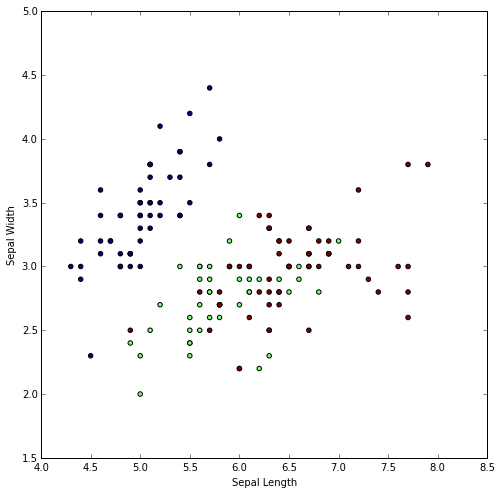

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(x=df['sepal_length'],y=df['sepal_width'], c=df['class'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

**Step 3:** Create newcomer:

In [38]:
x, y = random.uniform(4.5,8.0), random.uniform(2.0,4.5)
print x, y

5.6522668327 2.70002494991


**Step 4:** Manually create kNN algorithm with k=10 and predict the newcomer's class:

In [74]:
import math
from collections import Counter


distance=[]
for a, b, c, d in df[['sepal_length','sepal_width','class']].itertuples():
    dist = math.hypot(b-x, c-y)
    distance.append((dist, d))
distance.sort(key=lambda x: x[0])
types = [i[1] for i in distance[:10]]
lst = Counter(types).most_common()
highest_count = max([i[1] for i in lst])
result = [i[0] for i in lst if i[1]==highest_count][0]
print 'The new random point most likely belongs to class {}, using KNN={}.'.format(result, 10)

The new random point most likely belongs to class 1, using KNN=10.


**Step 5:** Create a kNN function to predict the newcomer's class with different values for k:

In [81]:
def knn(k):
    distance = []
    for a, b, c, d in df[['sepal_length','sepal_width','class']].itertuples():
        dist = math.hypot(b-x, c-y)
        distance.append((dist, d))
    distance.sort(key=lambda x: x[0])
    types = [i[1] for i in distance[:k]]
    lst = Counter(types).most_common()
    highest_count = max([i[1] for i in lst])
    result = [i[0] for i in lst if i[1]==highest_count][0]
    print 'The new random point ({}, {}) most likely belongs to class {}, using KNN={}.'.format(x, y, result, k)

knn(11)

The new random point (5.6522668327, 2.70002494991) most likely belongs to class 1, using KNN=11.
